In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [256]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
from sklearn.feature_extraction import stop_words

In [31]:
from sklearn.cluster import KMeans

In [5]:
import spacy

In [27]:
from textblob import TextBlob

In [43]:
import re

In [6]:
pd.set_option("display.max_colwidth", 200)

In [7]:
pd.set_option("display.max_rows", 500)

## Load the texts

In [384]:
df = pd.read_excel('Reden.xlsx')
df.head(2)

,Jahr,Redner,Funktion,Partei,Sprache,Ort,Titel,Anrede,Präambel,Text,URL
0,2016,Didier Burkhalter,BR,FDP,fr,Vallorbe,«Le mariage suisse de l’eau et du feu»,"Mesdames et Messieurs les représentants des autorités,\nMesdames et Messieurs,\n\nChers habitants de notre pays, Chers amis,",NaN,"Mesdames et Messieurs les représentants des autorités,\nMesdames et Messieurs,\n\nChers habitants de notre pays, Chers amis,\n\nQuel plaisir de partager la Fête nationale avec vous ! Et le 1er ao...",https://www.admin.ch/gov/de/start/dokumentation/reden/reden-der-bundesraete.msg-id-62929.html
1,2016,Doris Leuthard,BR,CVP,de,Schaffhausen,"Wer entscheidet, muss zuhören!",Sehr geehrter Herr Regierungspräsident (Reto Dubach)\nSehr geehrter Herr Stadtpräsident (Peter Neukomm)\nSehr geehrter Herr Schilling (Präsident NHG-SH)\nLiebe Schaffhauserinnen und Schaffhauser\n...,NaN,Sehr geehrter Herr Regierungspräsident (Reto Dubach)\nSehr geehrter Herr Stadtpräsident (Peter Neukomm)\nSehr geehrter Herr Schilling (Präsident NHG-SH)\nLiebe Schaffhauserinnen und Schaffhauser\n...,https://www.admin.ch/gov/de/start/dokumentation/reden/reden-der-bundesraete.msg-id-62930.html


In [385]:
## LIMITING TO PRESIDENTS RIGHT NOW!!!!!!!!!!!!

In [386]:
df = df[df['Funktion'] == "BP"].reset_index()
df.pop('index')

0     17
1     18
2     19
3     20
4     21
5     22
6     23
7     24
8     25
9     26
10    27
11    28
12    29
13    30
14    31
15    32
16    33
17    34
18    35
19    36
20    37
21    38
22    39
23    40
24    41
25    42
26    43
27    44
28    45
29    46
30    47
31    48
32    49
33    50
Name: index, dtype: int64

In [387]:
df.head(2)

,Jahr,Redner,Funktion,Partei,Sprache,Ort,Titel,Anrede,Präambel,Text,URL
0,2017,Doris Leuthard,BP,CVP,de,NaN,Ansprache von Bundespräsidentin Doris Leuthard zum 1. August 2017,Sehr geehrte Damen und Herren,NaN,"Sehr geehrte Damen und Herren\n\nIch hoffe, sie konnten den bisherigen Sommer geniessen und dürfen heute mit der Familie, mit Freunden – in der Gemeinde unseren Nationalfeiertag begehen. Ich gratu...",https://www.admin.ch/gov/de/start/dokumentation/reden/ansprachen-zum-nationalfeiertag/2017.html
1,2016,Johann N. Schneider-Ammann,BP,FDP,de,NaN,Ansprache von Bundespräsident Johann N. Schneider-Ammann zum 1. August 2016,Liebe Mitbürgerinnen und Mitbürger,NaN,"Liebe Mitbürgerinnen und Mitbürger\n\nDer 1. August ist ein guter Tag,\num über die Chancen nachzudenken,\ndie unser Land uns bietet.\n\nIch nenne heute drei:\nBildung, Innovation und Unabhängigke...",https://www.admin.ch/gov/de/start/dokumentation/reden/ansprachen-zum-nationalfeiertag/2016.html


## Some basic stuff

### Most used adresses

In [388]:
df.Anrede.value_counts()

Liebe Mitbürgerinnen und Mitbürger                                                                          11
Liebe Mitbürgerinnen, liebe Mitbürger                                                                        2
Sehr geehrte Damen und Herren                                                                                1
Liebe Mitbürgerinnen und Mitbürger\nCharas convischinas e chars convischins                                  1
Liebe Mitbürgerinnen und Mitbürger, meine Damen und Herren                                                   1
Liebe Mitbürgerinnen und Mitbürger!                                                                          1
Liebe Mitbürgerinnen und Mitbürger in der Schweiz und im Ausland                                             1
Liebe Mitbürgerinnen und Mitbürger, guten Tag                                                                1
Sehr geehrte Damen und Herren\nLiebe Einwohnerinnen und Einwohner unseres Landes                             1
L

### Longest addresses

In [389]:
df['Anrede-Len'] = df['Anrede'].str.len()

In [390]:
df.sort_values(by='Anrede-Len', ascending=False)[['Jahr', 'Redner', 'Anrede', 'Anrede-Len']].head(5)

,Jahr,Redner,Anrede,Anrede-Len
16,2001,Moritz Leuenberger,"Liebe Schweizerinnen und Schweizer im In- und Ausland, Liebe Ausländerinnen und Ausländer in der Schweiz",104.0
10,2007,Micheline Calmy-Rey,"Liebe Schweizerinnen und Schweizer, liebe Einwohnerinnen und Einwohner dieses Landes",84.0
3,2014,Didier Burkhalter,Sehr geehrte Damen und Herren\nLiebe Einwohnerinnen und Einwohner unseres Landes,79.0
5,2012,Eveline Widmer-Schlumpf,Liebe Mitbürgerinnen und Mitbürger\nCharas convischinas e chars convischins,74.0
12,2005,Samuel Schmid,Liebe Mitbürgerinnen und Mitbürger in der Schweiz und im Ausland,64.0


### Text length

In [391]:
df['Text-Len'] = df['Text'].str.len()

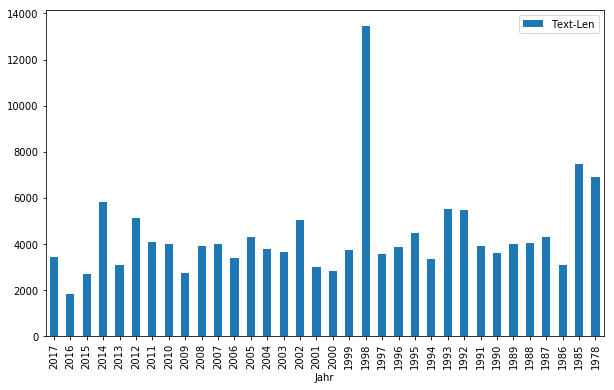

In [392]:
df.plot(kind="bar", y='Text-Len', x='Jahr', figsize=(10,6))

### Longest Text

In [393]:
df.sort_values(by='Text-Len', ascending=False)[['Jahr', 'Redner', 'Text-Len']].head(5)

,Jahr,Redner,Text-Len
19,1998,Flavio Cotti,13470
32,1985,Kurt Furgler,7476
33,1978,Willi Ritschard,6913
3,2014,Didier Burkhalter,5827
24,1993,Adolf Ogi,5534


In [394]:
df.groupby("Partei")['Text-Len'].mean()

Partei
BDP    5147.000000
CVP    5146.777778
FDP    3932.555556
SP     4088.636364
SVP    3935.750000
Name: Text-Len, dtype: float64

## Word evolution - scikit for beginners

In [396]:
#First let's use a TF-vectorizer on all words without any tokenization
#This gives the frequency of each word in a particular text (rows add up to 1)
vectorizer = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vectorizer.fit_transform(df['Text'])
matrix

<34x4223 sparse matrix of type '<class 'numpy.float64'>'
	with 11157 stored elements in Compressed Sparse Row format>

In [397]:
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results['Jahr'] = df['Jahr']
results['Redner'] = df['Redner']
results['Partei'] = df['Partei']
results.head(2)

,02,10,100,1291,15,150,157,1648,1798,1803,...,überzeugt,überzeugung,überzeugungen,üblich,übrigen,übt,übten,Jahr,Redner,Partei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,Doris Leuthard,CVP
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,Johann N. Schneider-Ammann,FDP


### Word frequencies over time

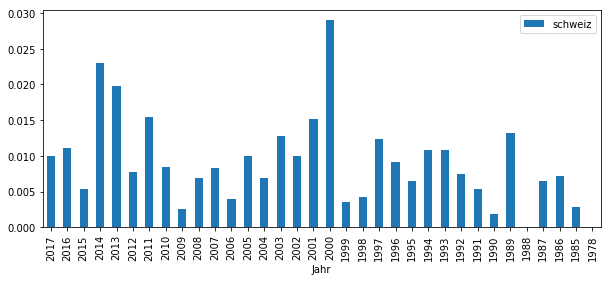

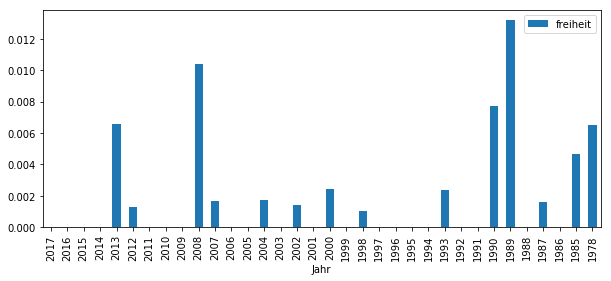

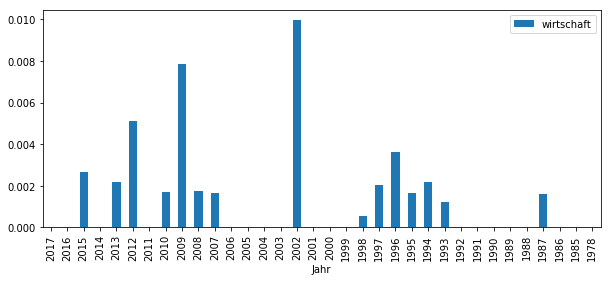

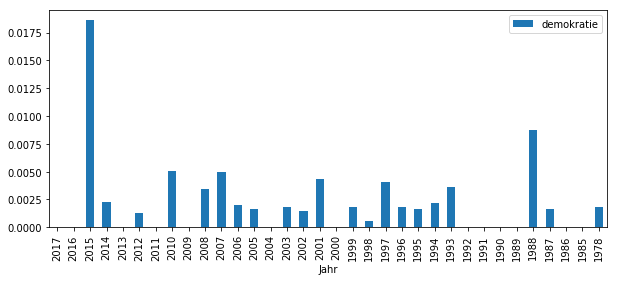

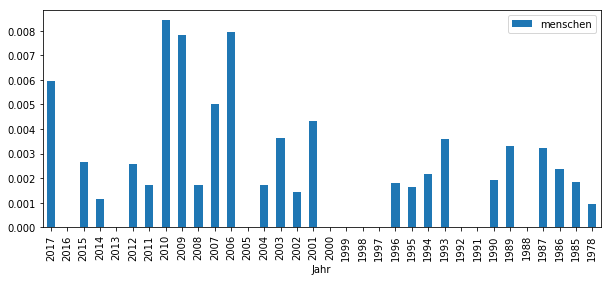

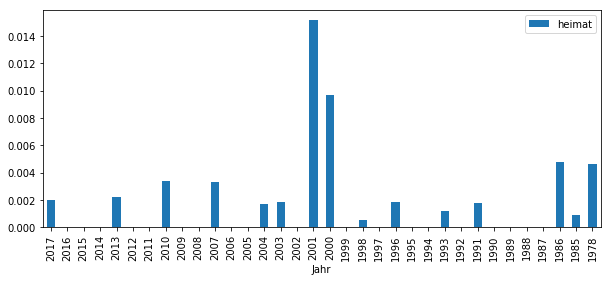

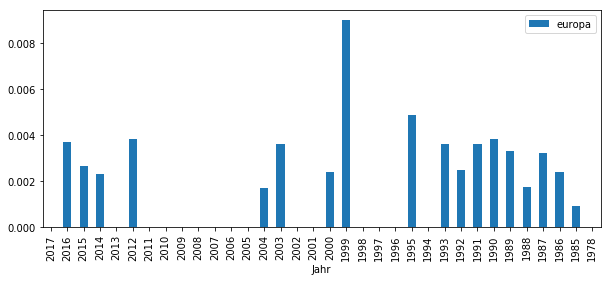

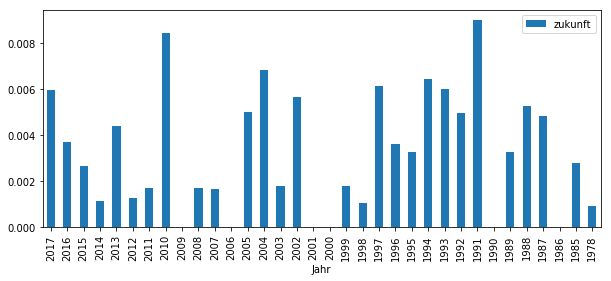

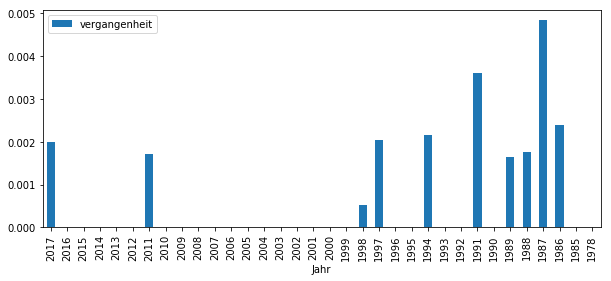

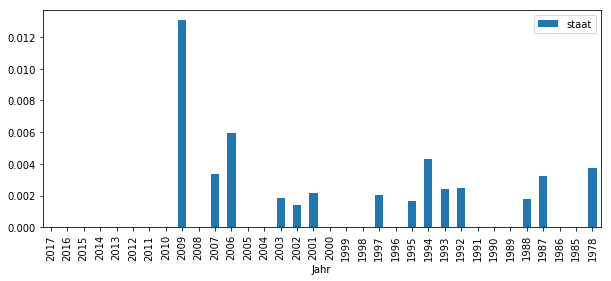

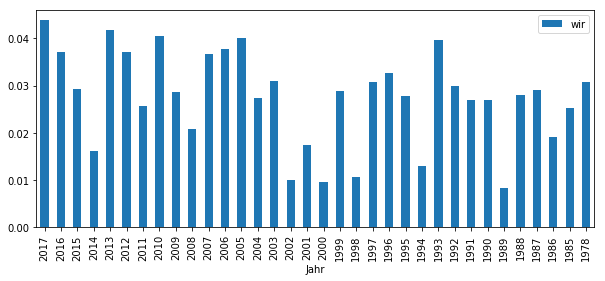

In [398]:
results.plot(kind="bar", y='schweiz', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='freiheit', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='wirtschaft', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='demokratie', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='menschen', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='heimat', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='europa', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='zukunft', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='vergangenheit', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='staat', x='Jahr', figsize=(10,4))
results.plot(kind="bar", y='wir', x='Jahr', figsize=(10,4))

### How often they talked about Switzerland

In [399]:
results.sort_values(by="schweiz", ascending=False).head(5)[['Jahr', 'Redner', 'Partei', 'schweiz']]

,Jahr,Redner,Partei,schweiz
17,2000,Adolf Ogi,SVP,0.028986
3,2014,Didier Burkhalter,FDP,0.023015
4,2013,Ueli Maurer,SVP,0.019780
6,2011,Micheline Calmy-Rey,SP,0.015411
16,2001,Moritz Leuenberger,SP,0.015152


In [400]:
results.sort_values(by="schweiz").head(5)[['Jahr', 'Redner', 'Partei', 'schweiz']]

,Jahr,Redner,Partei,schweiz
33,1978,Willi Ritschard,SP,0.000000
29,1988,Otto Stich,SP,0.000000
27,1990,Arnold Koller,CVP,0.001927
8,2009,Hans-Rudolf Merz,FDP,0.002611
32,1985,Kurt Furgler,CVP,0.002796


### What the parties are talking abut

In [401]:
results.groupby('Partei')['schweiz'].mean().sort_values(ascending=False)

Partei
SVP    0.017389
FDP    0.010574
BDP    0.007673
SP     0.006951
CVP    0.006559
Name: schweiz, dtype: float64

In [402]:
results.groupby('Partei')['europa'].mean().sort_values(ascending=False)

Partei
BDP    0.003836
FDP    0.001983
SP     0.001738
SVP    0.001503
CVP    0.001387
Name: europa, dtype: float64

In [403]:
results.groupby('Partei')['demokratie'].mean().sort_values(ascending=False)

Partei
SP     0.004194
FDP    0.001383
SVP    0.001316
BDP    0.001279
CVP    0.001076
Name: demokratie, dtype: float64

In [404]:
results.groupby('Partei')['wir'].mean().sort_values(ascending=False)

Partei
BDP    0.037084
SVP    0.032747
CVP    0.027910
SP     0.027816
FDP    0.023586
Name: wir, dtype: float64

In [405]:
results.groupby('Partei')['menschen'].mean().sort_values(ascending=False)

Partei
BDP    0.002558
SP     0.002541
FDP    0.002502
CVP    0.002477
SVP    0.000899
Name: menschen, dtype: float64

### Switzerland vs the People

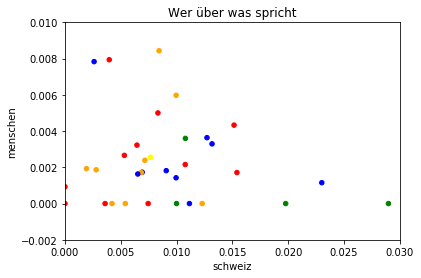

In [406]:
colormap = {
    'SVP': 'green',
    'SP': 'red',
    'CVP': 'orange',
    'FDP': 'blue',
    'BDP': 'yellow'
}
colors = results['Partei'].apply(lambda partei: colormap[partei])

ax = results.plot(x='schweiz', y='menschen', kind='scatter', color=colors, xlim=(0,0.03), ylim=(-0.002,0.01))
ax.set_title("Wer über was spricht")

### Most used words

## Clustering

### some stopwords

In [408]:
with open('stopwords/stopwords_129.txt', 'r') as f:
    stopwords_129 = re.split('\n', f.read())

In [409]:
with open('stopwords/stopwords_621.txt', 'r') as f:
    stopwords_621 = re.split('\n', f.read())

In [410]:
with open('stopwords/stopwords_1852.txt', 'r') as f:
    stopwords_1852 = re.split('\n', f.read())

In [411]:
specific_stopwords = ['august', 'mitbürgerinnen', 'mitbürger', 'damen', 'herren', 'liebe', 'jahr', 'tag']
#specific_stopwords += ['schweiz', 'land', 'landes']

In [412]:
stopwords = stopwords_1852 + specific_stopwords

### Vectorize + Cluster

In [413]:
# Vectorize and save into a new dataframe
vec = TfidfVectorizer(stop_words=stopwords,
                      max_df=0.9,
                      min_df=0.1,
                      #stop_words=custom_stopwords, #or use custom_stopwords as defined above
                      #max_features=100,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(df['Text'])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [414]:
# How many clusters?
number_of_clusters=4
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters using a ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

Fitting 4 clusters using a  (34, 345) matrix


<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [415]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
    

Top terms per cluster:
Cluster 0: geschichte entwicklung zukunft solidarität landes
Cluster 1: demokratie welt heimat menschen staat
Cluster 2: welt feiern zeiten unabhängigkeit europa
Cluster 3: freiheit schweizer solidarität landes schweizerinnen


In [416]:
df['category'] = km.labels_

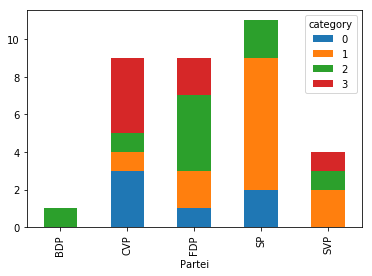

In [417]:
df[['Partei', 'category']].groupby(['Partei', 'category']).size().unstack().plot(kind="bar", stacked=True)

In [245]:
#Useful configs so far: max_df=0.9, min_df=0.1, number_of_clusters=4, stopwords_1852
#There is quite some overlap over the categories. Also, the composition across parties is not very clear.

## Similarity

In [418]:
#There is actually a big difference if we use stopwords or not!!!!!!!!!
vec = CountVectorizer(stop_words=stopwords_621)
matrix = vec.fit_transform(df['Text'])

In [419]:
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
results.head(2)

,02,10,100,1291,15,150,157,1648,1798,1803,...,überwinden,überwindung,überwunden,überzeugt,überzeugung,überzeugungen,üblich,übrigen,übt,übten
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Most conventional and most unconventional speech

In [420]:
results_mean = results.mean().to_frame().transpose()

In [421]:
similarities = cosine_similarity(results, results_mean)

In [422]:
df['conventionality'] = similarities

In [423]:
#The least conventional speeches
df.sort_values(by="conventionality").head(5)[['Jahr', 'Redner', 'conventionality']]

,Jahr,Redner,conventionality
29,1988,Otto Stich,0.337685
8,2009,Hans-Rudolf Merz,0.350926
11,2006,Moritz Leuenberger,0.367713
31,1986,Alphons Egli,0.370697
27,1990,Arnold Koller,0.411946


In [424]:
#The most conventional speeches
df.sort_values(by="conventionality", ascending=False).head(5)[['Jahr', 'Redner', 'conventionality']]

,Jahr,Redner,conventionality
24,1993,Adolf Ogi,0.619549
4,2013,Ueli Maurer,0.609257
3,2014,Didier Burkhalter,0.601521
10,2007,Micheline Calmy-Rey,0.559960
17,2000,Adolf Ogi,0.551561


### Conventionality by parties

In [425]:
#This totally makes sense
df.groupby('Partei')['conventionality'].mean()

Partei
BDP    0.514143
CVP    0.471373
FDP    0.493575
SP     0.479186
SVP    0.572353
Name: conventionality, dtype: float64

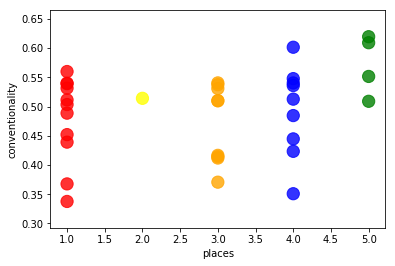

In [426]:
colormap = {
    'SVP': 'green',
    'SP': 'red',
    'CVP': 'orange',
    'FDP': 'blue',
    'BDP': 'yellow'
}
placemap = {
    'SVP': 5,
    'SP': 1,
    'CVP': 3,
    'FDP': 4,
    'BDP': 2
}
colors = df['Partei'].apply(lambda partei: colormap[partei])
df['places'] = df['Partei'].apply(lambda partei: placemap[partei])


ax = df.plot(x='places', y='conventionality', kind='scatter', color=colors, s=150, alpha=0.8)

## Emotions

In [427]:
#Nomad

## set up the emolex

In [428]:
filepath = "emolex/NRC-Emotion-Lexicon-v0.92-InManyLanguages-German.xlsx"
emolex_df = pd.read_excel(filepath)
emolex_df.head(2)

,word,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,Aal,0,0,0,0,0,1,0,0,0,0
1,Aasfresser,0,1,0,0,0,0,0,0,0,0


In [429]:
emolex_df.shape

(11812, 11)

In [430]:
#There are about 1500 duplicates
emolex_df.drop_duplicates(subset='word', inplace=True)
emolex_df.shape

(9629, 11)

In [431]:
positive_words = emolex_df[emolex_df.positive == 1].word
negative_words = emolex_df[emolex_df.negative == 1].word
anger_words = emolex_df[emolex_df.anger == 1].word
anticipation_words = emolex_df[emolex_df.anticipation == 1].word
disgust_words = emolex_df[emolex_df.disgust == 1].word
fear_words = emolex_df[emolex_df.fear == 1].word
joy_words = emolex_df[emolex_df.joy == 1].word
sadness_words = emolex_df[emolex_df.sadness == 1].word
surprise_words = emolex_df[emolex_df.surprise == 1].word
trust_words = emolex_df[emolex_df.trust == 1].word

In [432]:
emolex_df[emolex_df['word'] == 'Demokratie']

,word,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
2129,Demokratie,1,0,0,0,0,0,0,0,0,0


### Vectorize the speeches

In [433]:
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False,
                      norm='l1')

matrix = vec.fit_transform(df['Text'])
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
wordcount_df.head()

,Aal,Aasfresser,Abakus,abba,abbauen,Abbaustoffwechsel,abbilden,Abbildung,abbrechen,Abdeckung,...,Zyanid,zyklisch,Zyklon,Zyklus,Zylinder,zylindrisch,Zyniker,Zyste,zystische,Zytoplasma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [434]:
df['positive'] = wordcount_df[positive_words].sum(axis=1)
df['negative'] = wordcount_df[negative_words].sum(axis=1)
df['anger'] = wordcount_df[anger_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
df['fear'] = wordcount_df[fear_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
df['trust'] = wordcount_df[trust_words].sum(axis=1)

In [442]:
df['emotionality'] = df.anger + df.anticipation + df.disgust + df.fear + df.joy + df.sadness + df.surprise + df.trust

### Rank speeches by emotion

In [441]:
#the most negative
df.sort_values(by="negative", ascending=False)[['Jahr', 'Redner', 'negative']].head(5)

,Jahr,Redner,negative
21,1996,Jean-Pascal Delamuraz,0.255319
24,1993,Adolf Ogi,0.196721
11,2006,Moritz Leuenberger,0.195122
18,1999,Ruth Dreifuss,0.186047
4,2013,Ueli Maurer,0.177778


In [437]:
#the most positive
df.sort_values(by="positive", ascending=False)[['Jahr', 'Redner', 'positive']].head(5)

,Jahr,Redner,positive
8,2009,Hans-Rudolf Merz,0.481481
16,2001,Moritz Leuenberger,0.472222
9,2008,Pascal Couchepin,0.384615
1,2016,Johann N. Schneider-Ammann,0.380952
17,2000,Adolf Ogi,0.375000


In [438]:
#the most angry
df.sort_values(by="anger", ascending=False)[['Jahr', 'Redner', 'anger']].head(5)

,Jahr,Redner,anger
25,1992,René Felber,0.111111
30,1987,Pierre Aubert,0.071429
24,1993,Adolf Ogi,0.065574
6,2011,Micheline Calmy-Rey,0.062500
12,2005,Samuel Schmid,0.060000


In [439]:
#the most joyful
df.sort_values(by="joy", ascending=False)[['Jahr', 'Redner', 'joy']].head(5)

,Jahr,Redner,joy
8,2009,Hans-Rudolf Merz,0.222222
16,2001,Moritz Leuenberger,0.222222
20,1997,Arnold Koller,0.214286
10,2007,Micheline Calmy-Rey,0.181818
9,2008,Pascal Couchepin,0.173077


In [443]:
#most overall emotionality
df.sort_values(by="emotionality", ascending=False)[['Jahr', 'Redner', 'emotionality']].head(5)

,Jahr,Redner,emotionality
16,2001,Moritz Leuenberger,1.027778
9,2008,Pascal Couchepin,0.788462
20,1997,Arnold Koller,0.785714
27,1990,Arnold Koller,0.736842
0,2017,Doris Leuthard,0.681818


### Emotions over time

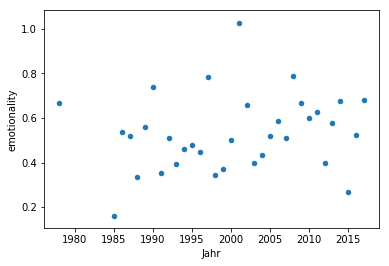

In [453]:
#general emotionality
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Jahr', y='emotionality', ax=ax)

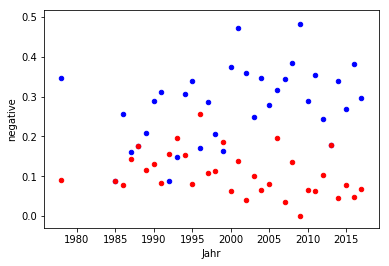

In [452]:
#speeches have become more positive, yay!
fig, ax = plt.subplots()

df.plot(kind='scatter', x='Jahr', y='positive', color='blue', ax=ax)
df.plot(kind='scatter', x='Jahr', y='negative', color='red', ax=ax)

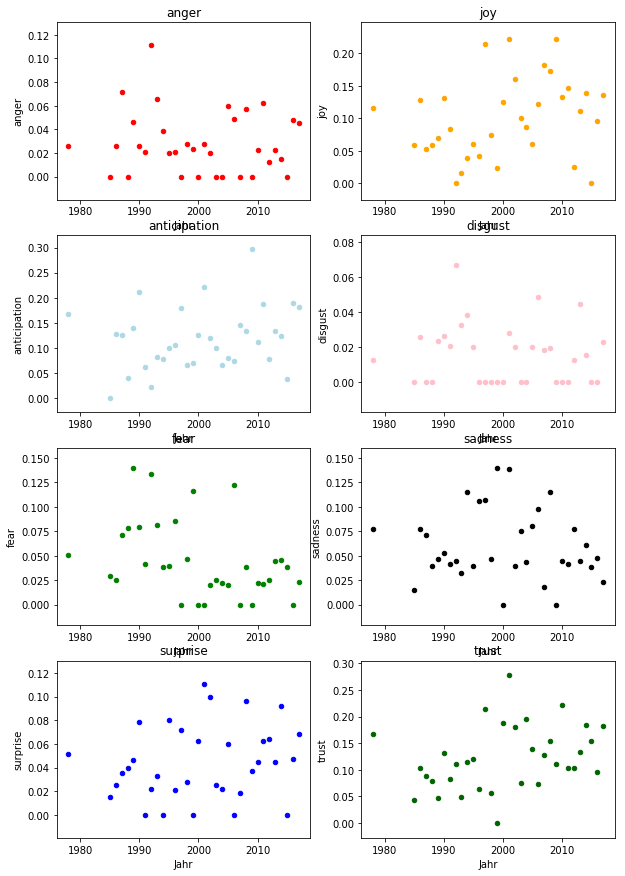

In [461]:
#
fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(4, 2, 1)
df.plot(kind='scatter', x='Jahr', y='anger', color='red', title='anger', ax=ax1)

ax2 = fig.add_subplot(4, 2, 2)
df.plot(kind='scatter', x='Jahr', y='joy', color='orange', title='joy', ax=ax2)

ax3 = fig.add_subplot(4, 2, 3)
df.plot(kind='scatter', x='Jahr', y='anticipation', color='lightblue', title='anticipation', ax=ax3)

ax4 = fig.add_subplot(4, 2, 4)
df.plot(kind='scatter', x='Jahr', y='disgust', color='pink', title='disgust', ax=ax4)

ax5 = fig.add_subplot(4, 2, 5)
df.plot(kind='scatter', x='Jahr', y='fear', color='green', title='fear', ax=ax5)

ax6 = fig.add_subplot(4, 2, 6)
df.plot(kind='scatter', x='Jahr', y='sadness', color='black', title='sadness', ax=ax6)

ax7 = fig.add_subplot(4, 2, 7)
df.plot(kind='scatter', x='Jahr', y='surprise', color='blue', title='surprise', ax=ax7)

ax8 = fig.add_subplot(4, 2, 8)
df.plot(kind='scatter', x='Jahr', y='trust', color='darkgreen', title='trust', ax=ax8)

### Emotions by party

## Tokenize

In [239]:
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [248]:
textblob_tokenizer(text)

['sehr',
 'geehrt',
 'damen',
 'und',
 'herren',
 'ich',
 'freue',
 'mich',
 'sehr',
 'hier',
 'in',
 'lindau',
 'zu',
 'ihnen',
 'sprechen',
 'zu',
 'dürfen',
 'ich',
 'bin',
 'ja',
 'ein',
 'verfecht',
 'de',
 'früh-französisch',
 'und',
 'deshalb',
 'muss',
 'ich',
 'natürlich',
 'auch',
 'konsequ',
 'sein',
 'ich',
 'werd',
 'heut',
 'also',
 'mein',
 'früh-deutsch',
 'an',
 'ihnen',
 'ausprobieren',
 'hier',
 'in',
 'lindau',
 'liegen',
 'die',
 'anfäng',
 'de',
 'berühmtesten',
 'bouillonwürfel',
 'der',
 'welt',
 'hier',
 'in',
 'lindau',
 'wurd',
 'der',
 'weltberühmt',
 'juliu',
 'maggi',
 'zum',
 'unternehm',
 'im',
 'alter',
 'von',
 'nur',
 '23',
 'jahren',
 'übernimmt',
 'er',
 '1869',
 'die',
 'hammer-mühl',
 'in',
 'kemptthal',
 'von',
 'seinem',
 'vater',
 'und',
 'wird',
 'in',
 'der',
 'folg',
 'einer',
 'der',
 'bedeutendsten',
 'mühlenbesitz',
 'in',
 'der',
 'schweiz',
 'doch',
 'die',
 'industrialisierung',
 'also',
 'neue',
 'techniken',
 'und',
 'die',
 'ausländ

In [246]:
text = '''
    Sehr geehrte Damen und Herren

Ich freue mich sehr, hier in Lindau zu Ihnen sprechen zu dürfen. Ich bin ja ein Verfechter des Früh-Französisch - und deshalb muss ich natürlich auch konsequent sein. Ich werde heute also mein Früh-Deutsch an Ihnen ausprobieren.

Hier in Lindau liegen die Anfänge des berühmtesten Bouillonwürfels der Welt. Hier in Lindau wurde der weltberühmte Julius Maggi zum Unternehmer.

Im Alter von nur 23 Jahren übernimmt er 1869 die Hammer-mühle in Kemptthal von seinem Vater und wird in der Folge einer der bedeutendsten Mühlenbesitzer in der Schweiz.

Doch die Industrialisierung - also neue Techniken und die ausländische Konkurrenz - bringt sein Geschäft in arge Bedrängnis. Maggi reagiert pragmatisch, intelligent und zukunftsgerichtet. Er beginnt nicht einfach, die Produktion zu steigern und er setzt auch nicht einfach auf Preiskampf.

Stattdessen steigt er ins Lebensmittelgeschäft ein. Genauer: in die Verarbeitung von „Leguminosen", also Hülsenfrüchten, zu einem neuartigen
Lebensmittel. Der Rest ist Geschichte.

Julius Maggi war übrigens von seinem eigenen Produkt dermassen begeistert, dass er eine seiner Töchter Leguminosa nennen wollte. Erst der erbitterte Widerstand der ganzen Familie brachte Maggi schliesslich von diesem Plan ab. Die Tochter wurde dann auf den Namen Lucy getauft - wofür sie sicher sehr dankbar war.

Julius Maggi stellte ausgezeichnete Fragen: Welches sind die vielversprechenden Märkte? Wie baue ich eine Unternehmenskultur auf, die die Mitarbeitenden motiviert?

Auch unser Land muss sich Fragen stellen.

    Wie gelingt es uns auch in Zukunft, Wettbewerbsfähigkeit und Solidarität zu verbinden?
    Wie halten wir unsere Gesellschaft zusammen? Und das trotz einer wachsenden kulturellen Vielfalt in unserem Land?
    Wie bewahren wir die Tradition der humanitären Schweiz? Und das in einer Zeit, in der Flüchtlinge häufig nur noch als Bedrohung wahrgenommen werden? 

Auch in Bezug auf Europa müssen wir uns die richtigen Fragen stellen:

    Wie gelingt es uns, unsere Identität und unsere politische Kultur zu erhalten?
    Und dabei trotzdem einen Weg mit unseren europäischen Nachbarn zu finden, der nicht in die Isolation führt? 

Die Herausforderungen im Zusammenhang mit der EU sind beträchtlich - sowohl bei der Frage der Migration wie auch beim institutionellen Verhältnis zu unserem wichtigsten Handelspartner.

Allerdings: So ungewöhnlich ist das nicht. Wir konnten den Entwicklungen in unserer Nachbarschaft noch nie einfach entspannt zusehen. Das zeigt ein Blick in die Geschichte.

Es ist auch nicht überraschend:

    Wir sind, geographisch und kulturell, mittendrin und tun uns - vielleicht gerade deswegen - manchmal schwer mit unserer Umgebung.
    Wir sind ein multikulturelles Land - kulturell aufs engste verbunden mit den drei grossen Sprachräumen Kontinentaleuropas.
    Unsere Identität haben wir immer sowohl mit unseren Nachbarn als auch gegen unsere Nachbarn definiert.
    Und als ein Land des Föderalismus und der direkten Demokratie haben wir uns stets etwas schwer getan mit zentralistischen Ansätzen. 

Wer sich mit Schweizer Geschichte beschäftigt, muss sich gar die Frage stellen: War unser Verhältnis zu den Nachbarn überhaupt je reibungsfrei?

Vielleicht am ehesten in der unheimlichen, aber stabilen Welt des Kalten Krieges, als die Schweiz eine geopolitische Nische besetzen konnte. Seither ist die Welt wieder nervöser, volatiler, unvorhersehbarer geworden.

Isolationismus kann keine Option sein. Zur Zusammenarbeit mit Europa gibt es keine sinnvolle Alternative. Wir sind eines der traditionell weltoffensten Länder der Welt. Wir würden ärmer werden - nicht nur im Portemonnaie, vor allem im Geist.

Die EU befindet sich in der schwierigsten Situation ihrer Geschichte. Es gilt, den Realitäten ins Auge zu blicken.

Gewiss, die Mitglieder der EU sollen uns und unsere Situation besser verstehen. Bei uns sorgen Druck auf die Löhne in den Grenzregionen, hohe Mieten, belastete Infrastrukturen für Unbehagen.

Aber wir müssen unsererseits auch die EU besser verstehen. Verstehen bedeutet: die EU in ihren historischen Voraussetzungen und gegenwärtigen Spannungsfeldern begreifen. Verstehen heisst nicht: mit allem, was die EU macht, einverstanden sein.

Nur wenn wir unsere Interessen und die der anderen wirklich kennen, ist es möglich, eine gute Lösung mit unserem wichtigsten Handelspartner zu finden. Und eine solche Lösung gilt es zu finden. Das wird uns auch gelingen.

Wir sind deshalb europapolitisch als Realisten und Pragmatiker gefordert. Und um auch das deutlich zu sagen: Realismus ist nicht Defätismus. Im Gegenteil: Realismus stärkt uns.

Eine weitere wichtige Lektion, die wir unserer Geschichte verdanken, ist unser Wille zum Zusammenhalt. Auch und gerade, als mächtige Fliehkräfte wirkten.

    Die Alten Eidgenossen hielten zusammen, als die Religionskriege ihre Gemeinschaft bedrohte, und entschieden sich gegen Allianzen mit ihren Glaubensbrüdern aus anderen Ländern.
    Im Ersten Weltkrieg - als die Schweiz wiederum auseinanderzudriften drohte - hielt man zusammen, trotz der jeweiligen kulturellen Sympathien für die kriegsführenden Staaten Deutschland und Frankreich.
    Auch in den dreissiger und vierziger Jahren, in der Ära von Totalitarismus und Faschismus, widerstand die Schweiz den Sirenengesängen
    des ethnischen Nationalismus, die unser Land zerstört hätten, wären sie erhört worden. 

Wir hielten zusammen, obwohl wir so verschieden sind - religiös, politisch, sprachlich oder sozial. Wir sind vielfältig und das ist eine Stärke. Auch heute zeigt sich, dass die gesellschaftliche Kohäsion kein Zustand ist - sondern eine Aufgabe, die nie zu Ende sein wird:

    Der Stadt-Land-Graben droht seit einiger Zeit, sich eher wieder zu vertiefen.
    Die Schweiz ist auch integrationspolitisch gefordert. Wir haben einen der höchsten Ausländeranteile der Welt. 

Wir leben in unsicheren Zeiten:

    Finanzkrise, Schuldenkrise, Eurokrise,
    die Alterung unserer Gesellschaft,
    der sich verschärfende globale Wettbewerb bei starkem Franken,
    die heraufdämmernde digitale Revolution,
    Globalisierung, Ungleichheit, Aufstieg neuer Mächte,
    eine Flüchtlingskrise, die auch unser Land herausfordert. 

Diese Unsicherheit ist ein guter Zeitpunkt, wieder einmal eingehend darüber zu debattieren, was wirklich wichtig ist für unser Land. Hier gibt unsere Geschichte eine klare Antwort: Wirklich wichtig war und ist eine kluge Politik des Zusammenhalts. Das ist bis heute die Grundlage unseres Erfolges.

Das bedeutet zum Beispiel: Wir müssen die flankierenden Massnahmen erhalten. Ältere Arbeitnehmende und Frauen müssen verstärkt in den Arbeitsmarkt integriert werden. Hier sind insbesondere die Arbeitgeber in unserem Land gefordert.

Die Bevölkerung muss davon überzeugt sein, dass unsere Offenheit sie nicht gefährdet. Weder auf dem Arbeitsmarkt noch auf dem Wohnungsmarkt. Mit anderen Worten: das Miteinander muss stärker bleiben als das Gegeneinander.

Gerade in einer Zeit, in der wir merken, dass wir nicht alles selber steuern können, müssen wir die Fundamente der Schweiz stärken. Zu diesen Fundamenten gehören auch die gesellschaftliche Fairness und die soziale Sicherheit im Alter. Wenn wir diese vernachlässigen, werden wir feststellen, dass die Unsicherheit nicht nur von aussen kommt, sondern auch noch von innen.

Wenn es im Laufe unserer Geschichte wirklich kritisch wurde, haben wir immer zusammengehalten. Im Innern - aber auch gegen aussen. Im Interesse unseres Landes. Denn dieses nationale Interesse ist unteilbar.

Den Menschen in der Schweiz ist am besten gedient, wenn wir realistisch und nüchtern bleiben.

Ist das weniger emotional? Vielleicht.

Ist es aber auch weniger patriotisch? Nein. Denn Realismus stärkt die Schweiz.

Ich wünsche allen ein schönes Dorffest und einen schönen Bundesfeiertag. 
'''